In [197]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
# Create dataframe and fill missing values
#columns=[I1, I2, I3, P_IPO,P_H,P_L,P_1Day,C1,C2,C3,C4]
IPO_df = pd.read_csv('Competition1_raw_data.csv', header=0, na_values=['-'])
IPO_df.head(5)


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


## Data Exploration

In [199]:
# Column names
IPO_df.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'],
      dtype='object')

In [200]:
# Information about the data set
IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [225]:
IPO_df.isnull().head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [226]:
IPO_df.isnull().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2          0
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64

Text(0, 0.5, 'values')

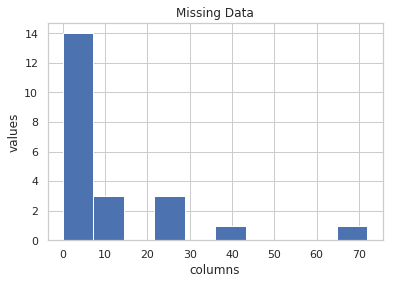

In [255]:
#Visualizing missing data
null_IPO= IPO_df.isnull().sum()
null_IPO.hist()



plt.title('Missing Data')
plt.xlabel('columns')

plt.ylabel('values')


In [201]:
IPO_df['C2'] = IPO_df['C2'].astype('bool')
IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         682 non-null bool
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: bool(1), float64(18), object(3)
memory usage: 112.6+ KB


In [202]:
# Number of passengers in each class
IPO_df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


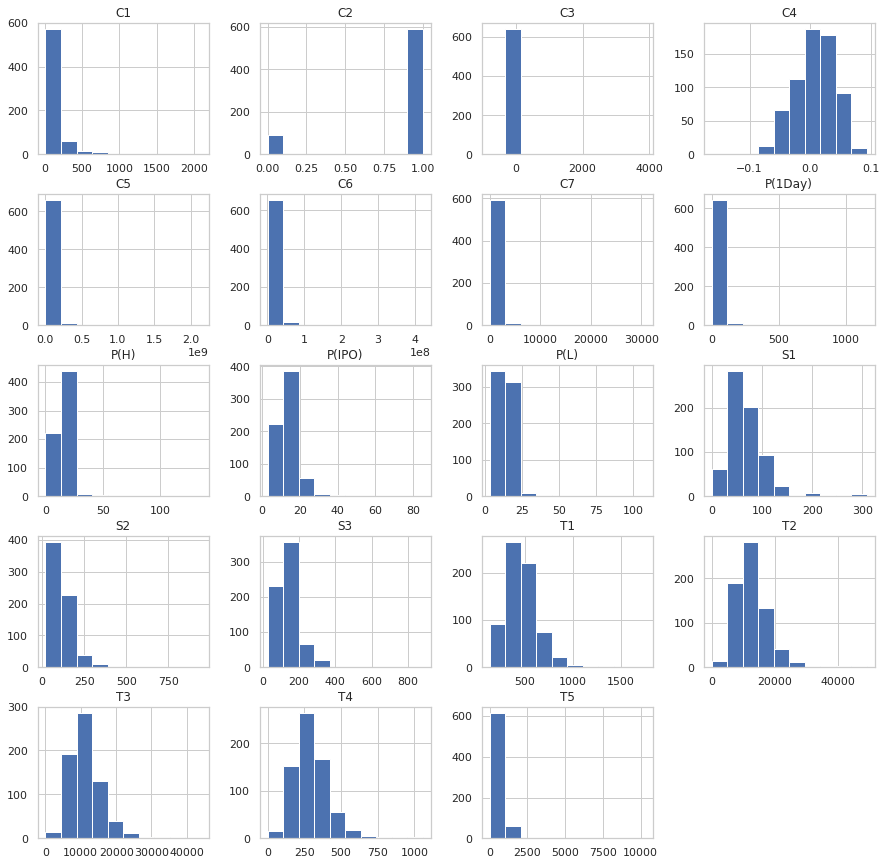

In [203]:
# IPO_df.hist(figsize=(11,11))
pd.DataFrame.hist(IPO_df, figsize = [15,15]);

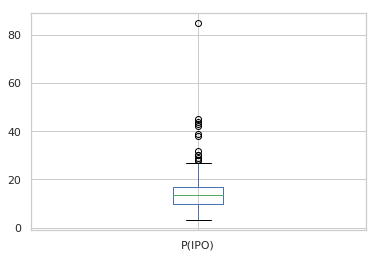

In [204]:
IPO_df.boxplot('P(IPO)')

In [223]:
np.isnan(IPO_df.columns)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
IPO_na = missingno_data.IPO_df()
IPO_na = IPO_na.replace("nan", np.nan)
IPO_na

In [211]:
IPO_df.bar

AttributeError: 'DataFrame' object has no attribute 'bar'

In [210]:
import pandas as pd
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
df.matrix
#msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

AttributeError: 'DataFrame' object has no attribute 'matrix'

In [205]:
IPO_df.confusion_matrix

AttributeError: 'DataFrame' object has no attribute 'confusion_matrix'

In [193]:
import quilt
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'quilt'

In [194]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

ModuleNotFoundError: No module named 'missingno'

## Data Pre-processing

In [10]:
df_num = IPO_df.select_dtypes(include=["float"])
df_cat = IPO_df.select_dtypes(exclude=["float"])

In [11]:
Q1 = df_num.quantile(0.20)
Q3 = df_num.quantile(0.80)
IQR = Q3 - Q1
idx = ~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)
df = pd.concat([df_num.loc[idx], df_cat.loc[idx]], axis=1)

In [12]:
df.shape

(454, 22)

In [13]:
skew = df.skew()
print(skew)

P(IPO)     0.206968
P(H)       0.037830
P(L)       0.166854
P(1Day)    0.843108
C1         1.096665
C3        -0.565202
C4        -0.350345
C5         1.386050
C6         1.328542
C7         2.202591
T1         0.517543
T2         0.680547
T3         0.580778
T4         0.533826
T5         0.660977
S1         0.722346
S2         0.925314
S3         0.687751
C2        -1.787693
dtype: float64


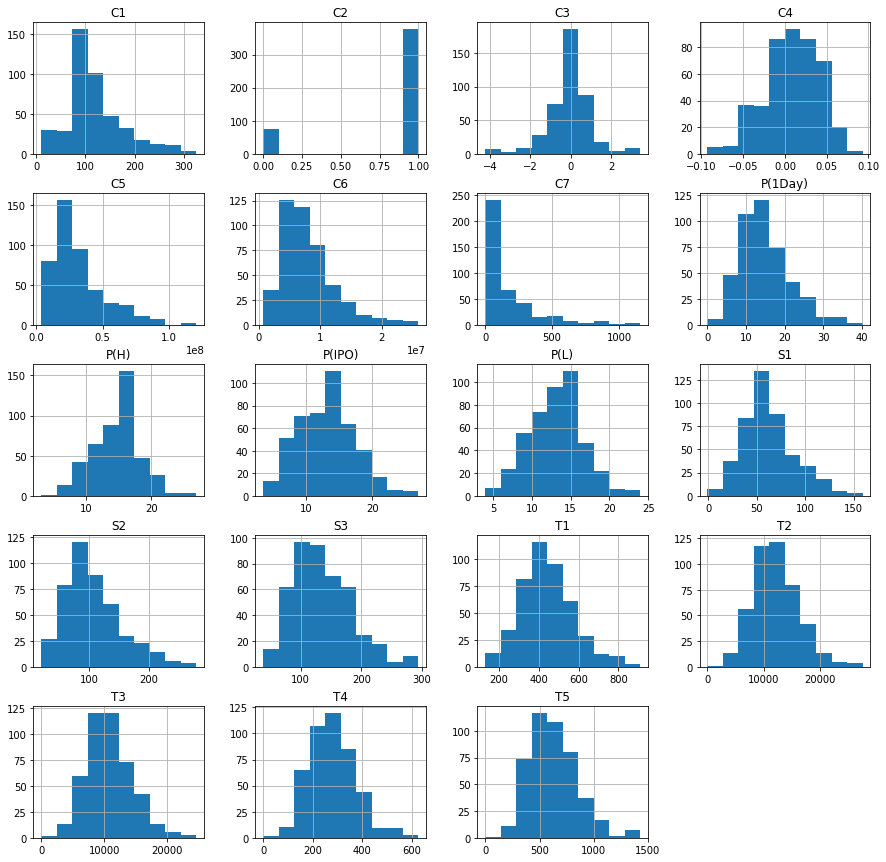

In [14]:
#df_cleaned.hist(figsize=(11,11))
pd.DataFrame.hist(df, figsize = [15,15]);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 680
Data columns (total 22 columns):
P(IPO)     450 non-null float64
P(H)       445 non-null float64
P(L)       445 non-null float64
P(1Day)    442 non-null float64
C1         442 non-null float64
C3         427 non-null float64
C4         442 non-null float64
C5         449 non-null float64
C6         449 non-null float64
C7         405 non-null float64
T1         454 non-null float64
T2         454 non-null float64
T3         454 non-null float64
T4         454 non-null float64
T5         454 non-null float64
S1         454 non-null float64
S2         454 non-null float64
S3         454 non-null float64
I1         454 non-null object
I2         454 non-null object
I3         447 non-null object
C2         454 non-null bool
dtypes: bool(1), float64(18), object(3)
memory usage: 78.5+ KB


In [16]:
df.shape

(454, 22)

In [17]:
pd.options.mode.use_inf_as_na = True

In [18]:
# Replace the missing data with median
df['P(IPO)'].fillna(df['P(IPO)'].mean(), inplace = True)
df['P(H)'].fillna(df['P(H)'].mean(), inplace = True)
df['P(L)'].fillna(df['P(L)'].mean(), inplace = True)
df['P(1Day)'].fillna(df['P(1Day)'].mean(), inplace = True)
df['C1'].fillna(df['C1'].mean(), inplace = True)
df['C2'].fillna(df['C2'].mode(), inplace = True)
df['C3'].fillna(df['C3'].mean(), inplace = True)
df['C4'].fillna(df['C4'].mean(), inplace = True)
df['C5'].fillna(df['C5'].mean(), inplace = True)
df['C6'].fillna(df['C6'].mean(), inplace = True)
df['C7'].fillna(df['C7'].mean(), inplace = True)

# Imputation using fillna with chaining method and and then selecting the top category, which is the mode, with the `.index` attribute
df['I3'].fillna(df['I3'].value_counts().index[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 680
Data columns (total 22 columns):
P(IPO)     454 non-null float64
P(H)       454 non-null float64
P(L)       454 non-null float64
P(1Day)    454 non-null float64
C1         454 non-null float64
C3         454 non-null float64
C4         454 non-null float64
C5         454 non-null float64
C6         454 non-null float64
C7         454 non-null float64
T1         454 non-null float64
T2         454 non-null float64
T3         454 non-null float64
T4         454 non-null float64
T5         454 non-null float64
S1         454 non-null float64
S2         454 non-null float64
S3         454 non-null float64
I1         454 non-null object
I2         454 non-null object
I3         454 non-null object
C2         454 non-null bool
dtypes: bool(1), float64(18), object(3)
memory usage: 78.5+ KB


In [19]:
df.head(20)

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,T3,T4,T5,S1,S2,S3,I1,I2,I3,C2
0,10.000,9.500000,8.500000,11.870000,122.000000,3.430000,0.029074,4.096205e+07,1.060000e+07,51.345000,...,11560.0,301.0,690.0,62.0,117.0,139.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,True
1,8.000,10.000000,8.000000,7.250000,259.000000,-1.620000,-0.013352,2.886920e+07,2.400000e+06,25.936000,...,19585.0,510.0,1120.0,71.0,242.0,237.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,False
2,7.000,14.000000,12.000000,6.700000,90.000000,-1.240000,0.020715,1.684567e+07,5.000000e+06,7.378000,...,4785.0,128.0,325.0,61.0,33.0,60.0,ACAD,ACADIA PHARMACEUTICALS INC,2834,True
3,11.500,16.000000,14.000000,12.390000,209.000000,-0.910000,0.020023,1.484864e+07,4.500000e+06,8.526000,...,7574.0,177.0,509.0,80.0,59.0,110.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834,True
5,13.500,14.500000,12.500000,14.200000,94.000000,0.060000,-0.057556,4.240292e+07,7.407407e+06,197.591000,...,13934.0,328.0,815.0,62.0,96.0,181.0,ACOM,Ancestry.com Inc.,7379,True
6,6.000,13.000000,11.000000,6.720000,128.000000,-1.870000,0.004106,1.904702e+07,5.500000e+06,5.146000,...,13953.0,379.0,698.0,82.0,106.0,135.0,ACOR,ACORDA THERAPEUTICS INC,2836,True
7,5.000,14.000000,12.000000,4.550000,91.000000,-0.740000,0.040620,1.937175e+07,8.000000e+06,167.408099,...,10056.0,276.0,-1.0,55.0,120.0,122.0,ACRX,ACELRX PHARMACEUTICALS INC,2834,False
8,15.000,18.000000,16.000000,15.900000,100.000000,-0.510000,-0.029316,5.298250e+07,1.100000e+07,279.600000,...,13463.0,335.0,917.0,58.0,124.0,234.0,ACTV,ACTIVE NETWORK INC,7372,True
9,9.000,19.000000,17.000000,0.000000,106.000000,1.490000,-0.024925,3.362269e+07,1.100000e+07,494.008000,...,8107.0,198.0,459.0,81.0,90.0,147.0,ACW,ACCURIDE CORP,3714,True
10,13.098,14.574719,12.652247,14.985749,118.911765,-0.067148,0.008536,3.121451e+07,7.987537e+06,167.408099,...,6747.0,169.0,263.0,51.0,65.0,74.0,ADKU,"ADCARE HEALTH SYSTEMS, INC",2834,True


In [20]:
# Check for the number of null-values in I3 column
df.I3.isnull().values.sum()

0

In [21]:
#df['I3'].value_counts()

In [22]:
# check the value in column contains ',', if so then replace the whole value as '0'
df.I3[df.I3.str.contains(",")] = '0'
df.I3[df.I3.str.contains(" ")] = '0'

# look at the value counts to see if they are changed
#df['I3'].value_counts()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 680
Data columns (total 22 columns):
P(IPO)     454 non-null float64
P(H)       454 non-null float64
P(L)       454 non-null float64
P(1Day)    454 non-null float64
C1         454 non-null float64
C3         454 non-null float64
C4         454 non-null float64
C5         454 non-null float64
C6         454 non-null float64
C7         454 non-null float64
T1         454 non-null float64
T2         454 non-null float64
T3         454 non-null float64
T4         454 non-null float64
T5         454 non-null float64
S1         454 non-null float64
S2         454 non-null float64
S3         454 non-null float64
I1         454 non-null object
I2         454 non-null object
I3         454 non-null object
C2         454 non-null bool
dtypes: bool(1), float64(18), object(3)
memory usage: 78.5+ KB


## Feature Engineering

#### Feature Creation : derive new variables from existing variable and by creating dummy variables.

In [24]:
# Add Positive EPS dummy column C3_D with dummy variable set to 1 if C3 is positive, otherwise 0. 
df['C3_D'] = pd.get_dummies(df.C3 > 0, drop_first=True, dtype=bool)

# Add Share Overhang column C5_D.
df['C5_D']=df['C5']/df['C6']

# Add Up Revision column C6_D.
df['P(mid)'] = ((df['P(H)']+df['P(L)'])/2)
df['C6_D'] = ((df['P(IPO)']-df['P(mid)'])/df['P(mid)']*0.01).where((df['P(IPO)'] > df['P(mid)']), 0)

In [25]:
# Create column T1_D with Percent of long sentences
df['T1_D']=df['T4']/df['T1']
# Create column T3_D with Percent of real words
df['T3_D']=df['T3']/df['T2']
# Create column T5_D with Percent of long words
df['T5_D']=df['T5']/df['T2']
# Create column S1_D with Percent of Positive words
df['S1_D']=df['S1']/df['T2']
# Create column S2_D with Percent of real words
df['S2_D']=df['S2']/df['T2']
# Create column S3_D with Percent of real words
df['S3_D']=df['S3']/df['T2']

In [26]:
df['T3_D'].fillna(df['T3_D'].mean(), inplace = True)
df['T5_D'].fillna(df['T5_D'].mean(), inplace = True)
df['S1_D'].fillna(df['S1_D'].mean(), inplace = True)
df['S2_D'].fillna(df['S2_D'].mean(), inplace = True)
df['S3_D'].fillna(df['S3_D'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 680
Data columns (total 32 columns):
P(IPO)     454 non-null float64
P(H)       454 non-null float64
P(L)       454 non-null float64
P(1Day)    454 non-null float64
C1         454 non-null float64
C3         454 non-null float64
C4         454 non-null float64
C5         454 non-null float64
C6         454 non-null float64
C7         454 non-null float64
T1         454 non-null float64
T2         454 non-null float64
T3         454 non-null float64
T4         454 non-null float64
T5         454 non-null float64
S1         454 non-null float64
S2         454 non-null float64
S3         454 non-null float64
I1         454 non-null object
I2         454 non-null object
I3         454 non-null object
C2         454 non-null bool
C3_D       454 non-null bool
C5_D       454 non-null float64
P(mid)     454 non-null float64
C6_D       454 non-null float64
T1_D       454 non-null float64
T3_D       454 non-null float64
T5_D    

In [27]:
df['I3'] = df['I3'].astype('float')

In [28]:
df['I3'].head()

0    3674.0
1    2834.0
2    2834.0
3    2834.0
5    7379.0
Name: I3, dtype: float64

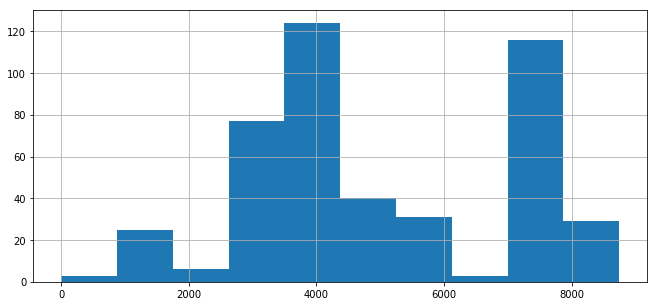

In [29]:
pd.Series.hist(df.I3, figsize = [11,5])

In [30]:
def assign_label(df_I3):
    if df_I3 > 0 and df_I3 < 4000:
        return 1
    elif df_I3 >= 4000 and df_I3 < 6000:
        return 2
    elif df_I3 >= 6000 and df_I3 < 10000:
        return 3
    elif df_I3 >= 10000:
        return 4
      
df['I3'] = df['I3'].apply(assign_label)    
dummy_df = pd.get_dummies(df['I3'], prefix='Class')
df = pd.concat([df, dummy_df], axis=1)

df.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,Class_1.0,Class_2.0,Class_3.0
0,10.0,9.5,8.5,11.87,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,...,0.001111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,1,0,0
1,8.0,10.0,8.0,7.25,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,...,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,1,0,0
2,7.0,14.0,12.0,6.70,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,...,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,1,0,0
3,11.5,16.0,14.0,12.39,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,...,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,1,0,0
5,13.5,14.5,12.5,14.20,94.0,0.06,-0.057556,42402916.0,7407407.0,197.591,...,0.000000,0.643137,0.774154,0.045280,0.003445,0.005334,0.010056,0,0,1


In [31]:
# Add Pre-IPO Price Revision column Y1.
df['Y1'] = np.where(df['P(IPO)'] < ((df['P(H)'] + df['P(L)'])/2), '1', '0')
df['Y1'] = df['Y1'].astype('int')

#Add Post-IPO Initial Return column Y2.
df['Y2'] = np.where(df['P(IPO)'] < df['P(1Day)'], '1', '0')
df['Y2'] = df['Y2'].astype('int')

df.info()
#df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 680
Data columns (total 37 columns):
P(IPO)       454 non-null float64
P(H)         454 non-null float64
P(L)         454 non-null float64
P(1Day)      454 non-null float64
C1           454 non-null float64
C3           454 non-null float64
C4           454 non-null float64
C5           454 non-null float64
C6           454 non-null float64
C7           454 non-null float64
T1           454 non-null float64
T2           454 non-null float64
T3           454 non-null float64
T4           454 non-null float64
T5           454 non-null float64
S1           454 non-null float64
S2           454 non-null float64
S3           454 non-null float64
I1           454 non-null object
I2           454 non-null object
I3           451 non-null float64
C2           454 non-null bool
C3_D         454 non-null bool
C5_D         454 non-null float64
P(mid)       454 non-null float64
C6_D         454 non-null float64
T1_D         454 no

In [32]:
drop_cols = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)','I1','I2','I3', 'C3', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

In [33]:
df = df.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 680
Data columns (total 18 columns):
C1           454 non-null float64
C4           454 non-null float64
C7           454 non-null float64
C2           454 non-null bool
C3_D         454 non-null bool
C5_D         454 non-null float64
C6_D         454 non-null float64
T1_D         454 non-null float64
T3_D         454 non-null float64
T5_D         454 non-null float64
S1_D         454 non-null float64
S2_D         454 non-null float64
S3_D         454 non-null float64
Class_1.0    454 non-null uint8
Class_2.0    454 non-null uint8
Class_3.0    454 non-null uint8
Y1           454 non-null int64
Y2           454 non-null int64
dtypes: bool(2), float64(11), int64(2), uint8(3)
memory usage: 51.9 KB


In [34]:
df_num = df.select_dtypes(include=["float"])
df_cat = df.select_dtypes(exclude=["float"])

In [35]:
Q1 = df_num.quantile(0.20)
Q3 = df_num.quantile(0.80)
IQR = Q3 - Q1
idx = ~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)
df = pd.concat([df_num.loc[idx], df_cat.loc[idx]], axis=1)

In [36]:
skew = df.skew()
print(skew)

C1           0.648642
C4          -0.312000
C7           1.361017
C5_D         0.693582
C6_D         1.394143
T1_D        -0.158401
T3_D        -0.599229
T5_D        -0.194527
S1_D         0.654196
S2_D         0.488709
S3_D         0.448924
C2          -1.658815
C3_D         0.038102
Class_1.0   -0.070793
Class_2.0    1.949117
Class_3.0    0.762604
Y1           0.016327
Y2          -0.944148
dtype: float64


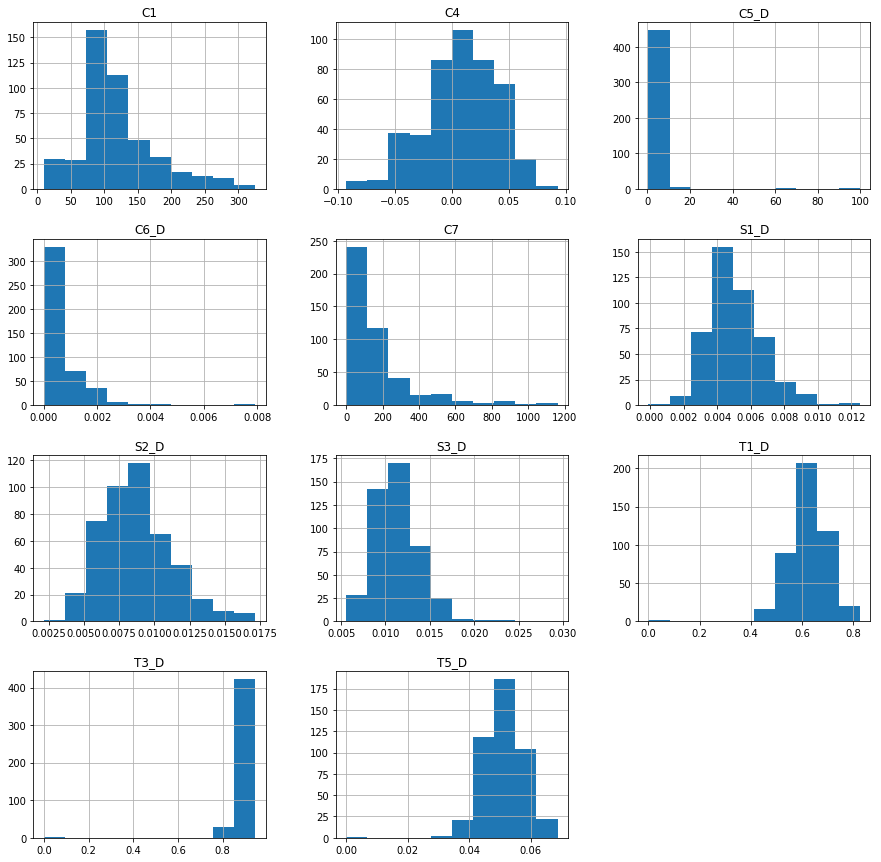

In [37]:
pd.DataFrame.hist(df_num, figsize = [15,15]);

In [38]:
df['C1'] = df.C1**(1/2)

In [39]:
# Norm_C6D = np.log(df['C6_D'])

In [40]:
df['C7'] = df.C7**(1/3)

In [41]:
df['S3_D'] = df['S3_D']**(1/2)

In [42]:
df['T1_D'] = df['T1_D']**(2)

In [43]:
df['T3_D'] = df['T3_D']**(2)

In [44]:
df['T5_D'] = df['T5_D']**(2)

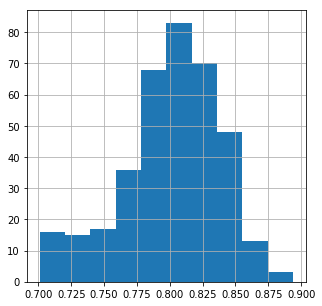

In [45]:
pd.Series.hist(df['T3_D'], figsize = [5,5])

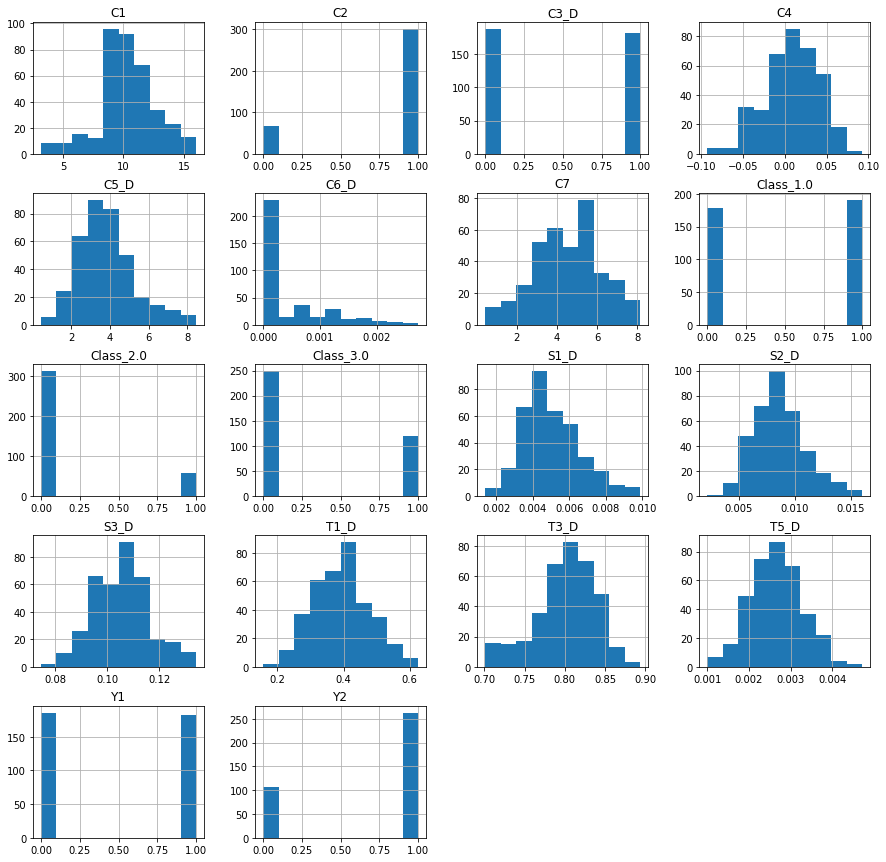

In [46]:
pd.DataFrame.hist(df, figsize = [15,15]);

In [47]:
#df['Y1'] = df['Y1'].astype('bool')
#df['Y2'] = df['Y2'].astype('bool')
#df['C2'] = df['C2'].astype('bool')

In [48]:
df.columns

Index(['C1', 'C4', 'C7', 'C5_D', 'C6_D', 'T1_D', 'T3_D', 'T5_D', 'S1_D',
       'S2_D', 'S3_D', 'C2', 'C3_D', 'Class_1.0', 'Class_2.0', 'Class_3.0',
       'Y1', 'Y2'],
      dtype='object')

In [49]:
df['Class_1.0'] = df['Class_1.0'].astype('float')
df['Class_2.0'] = df['Class_2.0'].astype('float')
df['Class_3.0'] = df['Class_3.0'].astype('float')

### Feature Scaling 

##### Standardization - Continuous Feature

In [50]:
data_num = df.select_dtypes(exclude=['object'])
data_cat = df.select_dtypes(include=['object'])

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#x = cf.values #returns a numpy array
scaler= MinMaxScaler()
scaler.fit_transform(data_num)

array([[0.61256655, 0.65645816, 0.42676484, ..., 0.        , 0.        ,
        1.        ],
       [0.87765993, 0.60773724, 0.21009495, ..., 0.        , 1.        ,
        1.        ],
       [0.63341889, 0.52205509, 0.16913332, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.52352535, 0.81586921, 0.32646073, ..., 0.        , 1.        ,
        1.        ],
       [0.57663852, 0.66373059, 0.43920264, ..., 0.        , 0.        ,
        0.        ],
       [0.44055551, 0.67373725, 0.58029852, ..., 0.        , 0.        ,
        0.        ]])

In [52]:
#pd.DataFrame.hist(data_num, figsize = [15,15]);

In [53]:
data1 = pd.concat([data_num, data_cat], axis=1)

data1.head()

,C1,C4,C7,C5_D,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,C2,C3_D,Class_1.0,Class_2.0,Class_3.0,Y1,Y2
0,11.045361,0.029074,3.716773,3.864345,0.001111,0.410145,0.826056,0.002943,0.004875,0.009199,0.104540,True,True,1.0,0.0,0.0,0,1
3,14.456832,0.020023,2.042906,3.299697,0.000000,0.291205,0.840999,0.003798,0.009686,0.007144,0.115407,True,False,1.0,0.0,0.0,1,1
6,11.313708,0.004106,1.726460,3.463095,0.000000,0.586230,0.784031,0.001962,0.005204,0.006727,0.092559,True,False,1.0,0.0,0.0,1,1
8,10.000000,-0.029316,6.539016,4.816591,0.000000,0.291948,0.826033,0.003832,0.003915,0.008371,0.125686,True,False,0.0,0.0,1.0,1,1
9,10.295630,-0.024925,7.905172,3.056608,0.000000,0.264490,0.787768,0.002525,0.008868,0.009853,0.126861,True,True,1.0,0.0,0.0,1,0


In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 680
Data columns (total 18 columns):
C1           369 non-null float64
C4           369 non-null float64
C7           369 non-null float64
C5_D         369 non-null float64
C6_D         369 non-null float64
T1_D         369 non-null float64
T3_D         369 non-null float64
T5_D         369 non-null float64
S1_D         369 non-null float64
S2_D         369 non-null float64
S3_D         369 non-null float64
C2           369 non-null bool
C3_D         369 non-null bool
Class_1.0    369 non-null float64
Class_2.0    369 non-null float64
Class_3.0    369 non-null float64
Y1           369 non-null int64
Y2           369 non-null int64
dtypes: bool(2), float64(14), int64(2)
memory usage: 49.7 KB


In [55]:
#data1.to_csv('out.csv', index=False)

#### Feature Selection

In [56]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [57]:
X = data1.drop(columns = ['Y1', 'Y2'])   #Feature Matrix
y1 = data1['Y1']          #Target Variable
y2 = data1['Y2']
df.head()

,C1,C4,C7,C5_D,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,C2,C3_D,Class_1.0,Class_2.0,Class_3.0,Y1,Y2
0,11.045361,0.029074,3.716773,3.864345,0.001111,0.410145,0.826056,0.002943,0.004875,0.009199,0.104540,True,True,1.0,0.0,0.0,0,1
3,14.456832,0.020023,2.042906,3.299697,0.000000,0.291205,0.840999,0.003798,0.009686,0.007144,0.115407,True,False,1.0,0.0,0.0,1,1
6,11.313708,0.004106,1.726460,3.463095,0.000000,0.586230,0.784031,0.001962,0.005204,0.006727,0.092559,True,False,1.0,0.0,0.0,1,1
8,10.000000,-0.029316,6.539016,4.816591,0.000000,0.291948,0.826033,0.003832,0.003915,0.008371,0.125686,True,False,0.0,0.0,1.0,1,1
9,10.295630,-0.024925,7.905172,3.056608,0.000000,0.264490,0.787768,0.002525,0.008868,0.009853,0.126861,True,True,1.0,0.0,0.0,1,0


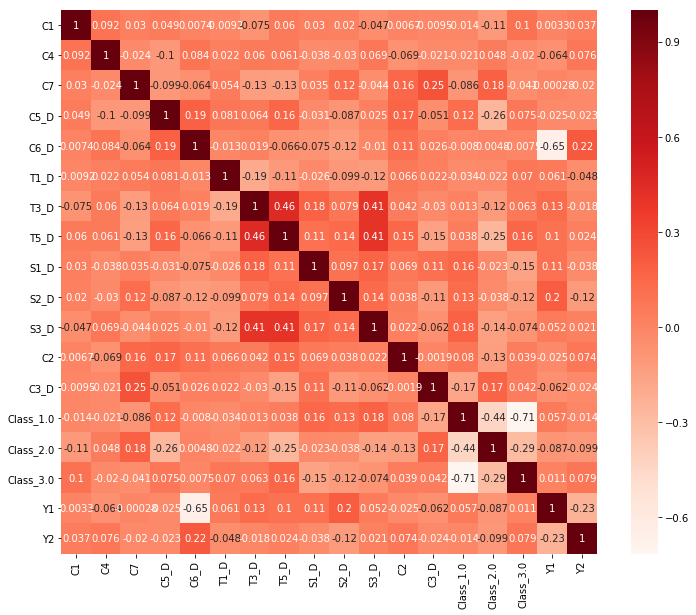

In [58]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [59]:
#Correlation with output variable Y1
cor_target1 = abs(cor["Y1"])
#Selecting highly correlated features
relevant_features = cor_target1[cor_target1>0.5]
relevant_features

C6_D    0.653076
Y1      1.000000
Name: Y1, dtype: float64

In [60]:
#Correlation with output variable Y1
cor_target2 = abs(cor["Y2"])
#Selecting highly correlated features
relevant_features = cor_target2[cor_target2>0.5]
relevant_features

Y2    1.0
Name: Y2, dtype: float64

In [61]:
result_df = data1.drop(columns='C6_D')
result_df.head()

,C1,C4,C7,C5_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,C2,C3_D,Class_1.0,Class_2.0,Class_3.0,Y1,Y2
0,11.045361,0.029074,3.716773,3.864345,0.410145,0.826056,0.002943,0.004875,0.009199,0.104540,True,True,1.0,0.0,0.0,0,1
3,14.456832,0.020023,2.042906,3.299697,0.291205,0.840999,0.003798,0.009686,0.007144,0.115407,True,False,1.0,0.0,0.0,1,1
6,11.313708,0.004106,1.726460,3.463095,0.586230,0.784031,0.001962,0.005204,0.006727,0.092559,True,False,1.0,0.0,0.0,1,1
8,10.000000,-0.029316,6.539016,4.816591,0.291948,0.826033,0.003832,0.003915,0.008371,0.125686,True,False,0.0,0.0,1.0,1,1
9,10.295630,-0.024925,7.905172,3.056608,0.264490,0.787768,0.002525,0.008868,0.009853,0.126861,True,True,1.0,0.0,0.0,1,0


In [62]:
skew = result_df.skew()
print(skew)

C1          -0.240569
C4          -0.312000
C7          -0.116855
C5_D         0.693582
T1_D         0.146526
T3_D        -0.535655
T5_D         0.175248
S1_D         0.654196
S2_D         0.488709
S3_D         0.159002
C2          -1.658815
C3_D         0.038102
Class_1.0   -0.070793
Class_2.0    1.949117
Class_3.0    0.762604
Y1           0.016327
Y2          -0.944148
dtype: float64


In [63]:
X1 = result_df.drop(columns = ['Y1', 'Y2'])   #Feature Matrix
y1 = result_df['Y1']          #Target Variable
y2 = result_df['Y2']

In [64]:
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y1)  
#Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True  True False False False False  True
  True  True  True False]
[ 9  1  6  5  3  1  1 10  8  4  7  1  1  1  1  2]


In [65]:
#no of features
nof_list=np.arange(1,16)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_rfe = rfe.fit_transform(X1,y1)
    #X_test_rfe = rfe.transform(X_test)
    model.fit(X_rfe,y1)
    score = model.score(X_rfe,y1)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.577236


In [66]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y1)  
#Fitting the data to model
model.fit(X_rfe,y1)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['C4', 'T1_D', 'T3_D', 'C2', 'C3_D', 'Class_1.0', 'Class_2.0'], dtype='object')


In [67]:
selected_columns = ['C4', 'C2', 'C3_D', 'T1_D', 'T3_D', 'Class_1.0', 'Class_3.0','Y1','Y2']
result_df = pd.DataFrame(data=data1, columns=selected_columns)
result_df.head()

,C4,C2,C3_D,T1_D,T3_D,Class_1.0,Class_3.0,Y1,Y2
0,0.029074,True,True,0.410145,0.826056,1.0,0.0,0,1
3,0.020023,True,False,0.291205,0.840999,1.0,0.0,1,1
6,0.004106,True,False,0.586230,0.784031,1.0,0.0,1,1
8,-0.029316,True,False,0.291948,0.826033,0.0,1.0,1,1
9,-0.024925,True,True,0.264490,0.787768,1.0,0.0,1,0


In [68]:
result_df.to_csv('out.csv', index=False)

In [69]:
dataset = pd.read_csv('out.csv')

In [70]:
binning continuous variable

SyntaxError: invalid syntax (<ipython-input-70-3bea3ade9d3f>, line 1)

In [ ]:
Log to handle normalize

In [ ]:
Featurer Importance

In [111]:
IPO_df.shape

(682, 22)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [155]:
# Transform into binary variables
data_dum = pd.get_dummies(IPO_df, drop_first=True)
data_dum.head()
#data_dum.tail()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,I3_8082,I3_8090,I3_8099,I3_8200,I3_8221,I3_8322,I3_8351,I3_8711,I3_8731,I3_8742
0,10.0,9.5,8.5,11.870000,122.0,True,3.43,0.029074,40962052.0,10600000.0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,10.0,8.0,7.250000,259.0,False,-1.62,-0.013352,28869196.0,2400000.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,14.0,12.0,6.700000,90.0,True,-1.24,0.020715,16845668.0,5000000.0,...,0,0,0,0,0,0,0,0,0,0
3,11.5,16.0,14.0,12.390000,209.0,True,-0.91,0.020023,14848637.0,4500000.0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,21.0,19.0,56.599998,80.0,True,0.07,-0.034895,30741716.0,8250000.0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
# Split into test.train
data_train = data_dum.iloc[:1212]
data_test = data_dum.iloc[1212:]

# Transform into arrays for scikit-learn
X = data_train.values
test = data_test.values
y = data_dum['I3_8082']


In [182]:
from sklearn import tree
#x= df
#target_v= df['I3']
tm= tree.DecisionTreeClassifier()
tm = tm.fit(X,y)
tree.score( X,y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [173]:
import graphviz 
tree_data = tree.export_graphviz(tm, out_file=None) 
see_tree = graphviz.Source(tree_data) 
see_tree.render("tm") 


tree_data = tree.export_graphviz(tm, out_file=None, 
                         feature_names=df.relevant_features,  
                         class_names=df.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
see_tree = graphviz.Source(tree_data)  
see_tree

(682, 1581)

In [175]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [178]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

NameError: name 'fit' is not defined

In [177]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

#k=4 means we are telling the machine to select the best 4 features

# Summarize scores
np.set_printoptions(precision=3)
#precision=3 means 3 decimal places
print(fit.scores_)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [166]:
# Setup the hyperparameter grid
#dep = np.arange(1,9)
param_grid = {'max_depth' : dep}

# Instantiate a decision tree classifier: clf
clf = tree.DecisionTreeClassifier()

# Instantiate the GridSearchCV object: clf_cv
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit it to the data
clf_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

ValueError: Found input variables with inconsistent numbers of samples: [682, 7]

In [86]:

from sklearn.preprocessing import LabelEncoder

X= df
Y= [relevant_features]

In [82]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df['Y2']= labelencoder.fit_transform(df['Y2'])

In [ ]:
import graphviz 
tree_data = tree.export_graphviz(tm, out_file=None) 
see_tree = graphviz.Source(tree_data) 
see_tree.render("tm") 


tree_data = tree.export_graphviz(tm, out_file=None, 
                         feature_names=df.relevant_features,  
                         class_names=df.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
see_tree = graphviz.Source(tree_data)  
see_tree